<a href="https://colab.research.google.com/github/rachittayal123/advanced-computer-vision-n-video-analytics/blob/main/lab_8_rachit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python opencv-contrib-python

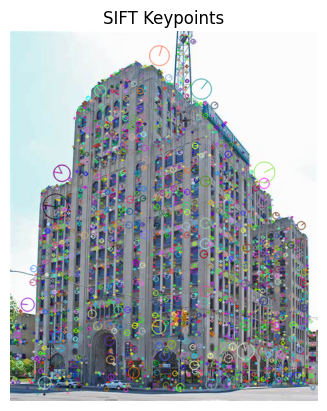

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('image2.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints
img_sift = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display
plt.imshow(cv2.cvtColor(img_sift, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.axis('off')
plt.show()

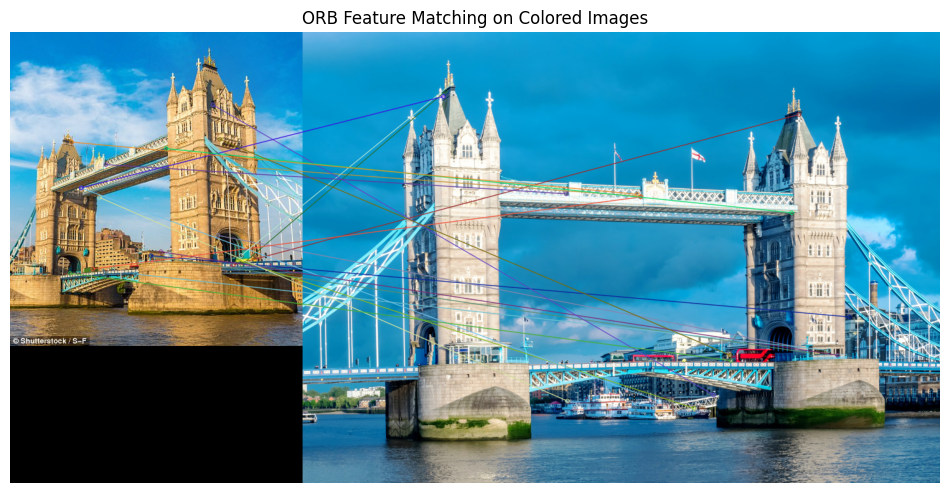

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load images in color
img1_color = cv2.imread('image3.jpg', cv2.IMREAD_COLOR)
img2_color = cv2.imread('image4.jpg', cv2.IMREAD_COLOR)

# Also convert to grayscale for ORB detection
img1_gray = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY)

# ORB detector
orb = cv2.ORB_create()

# Find keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1_gray, None)
kp2, des2 = orb.detectAndCompute(img2_gray, None)

# Create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw top 20 matches using color images
matched_img = cv2.drawMatches(img1_color, kp1, img2_color, kp2, matches[:20], None, flags=2)

# Display
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title("ORB Feature Matching on Colored Images")
plt.axis('off')
plt.show()


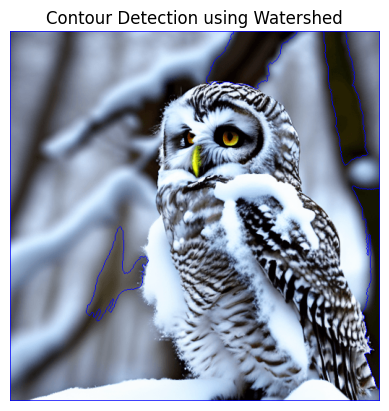

In [ ]:
import numpy as np

# Load image
img = cv2.imread('image7.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert to binary image
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0
markers = markers + 1

# Mark unknown region as 0
markers[unknown == 255] = 0

# Apply watershed
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]  # mark boundaries in red

# Show result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Contour Detection using Watershed")
plt.axis('off')
plt.show()

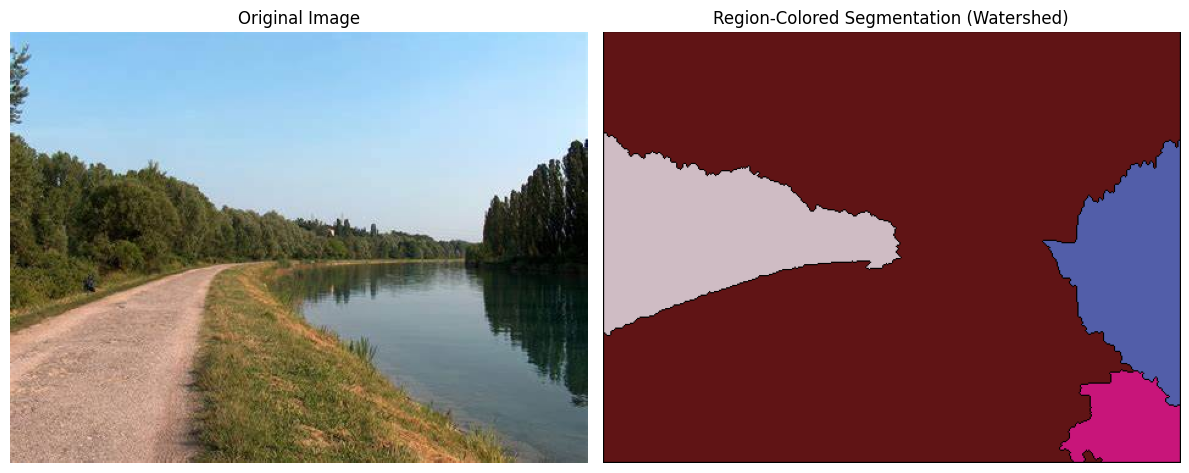

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('image8.jpg')
original = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)  # Convert for displaying with matplotlib
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Thresholding
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background and foreground areas
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed
markers = cv2.watershed(img, markers)

# Create a blank image to color each region
segmented = np.zeros_like(img)

# Assign random colors to each segment
for label in np.unique(markers):
    if label == -1:
        continue
    segmented[markers == label] = np.random.randint(0, 255, size=3)

# Convert to RGB for matplotlib
segmented_rgb = cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB)

# Display both original and segmented images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_rgb)
plt.title('Region-Colored Segmentation (Watershed)')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
!pip install torch torchvision matplotlib tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 37.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define transformations for normalization and augmentation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
])

# Load CIFAR-100 dataset
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Define DataLoaders
trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

100%|██████████| 169M/169M [00:07<00:00, 23.6MB/s]


Using device: cuda


In [ ]:
import torchvision.models as models
import torch.nn as nn

# Load pretrained ResNet models
resnet18 = models.resnet18(pretrained=True)
resnet34 = models.resnet34(pretrained=True)

# Modify the last fully connected layer to match CIFAR-100 (100 classes)
num_ftrs = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs, 100)
resnet34.fc = nn.Linear(num_ftrs, 100)

# Move models to device
resnet18 = resnet18.to(device)
resnet34 = resnet34.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 189MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed i

In [ ]:
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm

# Training function
def train_model(model, trainloader, optimizer, criterion, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in tqdm(trainloader, desc=f"Epoch {epoch+1}/{epochs}"):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        print(f"Epoch {epoch+1}: Loss: {running_loss/len(trainloader):.4f}, Accuracy: {100*correct/total:.2f}%")

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()

# Train ResNet-18
optimizer18 = optim.Adam(resnet18.parameters(), lr=0.001)
train_model(resnet18, trainloader, optimizer18, criterion, epochs=10)

# Train ResNet-34
optimizer34 = optim.Adam(resnet34.parameters(), lr=0.001)
train_model(resnet34, trainloader, optimizer34, criterion, epochs=10)

Epoch 1/10: 100%|██████████| 391/391 [00:22<00:00, 17.19it/s]


Epoch 1: Loss: 3.0017, Accuracy: 25.92%


Epoch 2/10: 100%|██████████| 391/391 [00:22<00:00, 17.57it/s]


Epoch 2: Loss: 2.2750, Accuracy: 39.41%


Epoch 3/10: 100%|██████████| 391/391 [00:22<00:00, 17.67it/s]


Epoch 3: Loss: 2.0262, Accuracy: 45.30%


Epoch 4/10: 100%|██████████| 391/391 [00:21<00:00, 18.15it/s]


Epoch 4: Loss: 1.8646, Accuracy: 48.95%


Epoch 5/10: 100%|██████████| 391/391 [00:21<00:00, 18.13it/s]


Epoch 5: Loss: 1.7509, Accuracy: 51.52%


Epoch 6/10: 100%|██████████| 391/391 [00:21<00:00, 17.89it/s]


Epoch 6: Loss: 1.6486, Accuracy: 53.90%


Epoch 7/10: 100%|██████████| 391/391 [00:22<00:00, 17.66it/s]


Epoch 7: Loss: 1.5678, Accuracy: 55.79%


Epoch 8/10: 100%|██████████| 391/391 [00:21<00:00, 18.34it/s]


Epoch 8: Loss: 1.4843, Accuracy: 57.49%


Epoch 9/10: 100%|██████████| 391/391 [00:22<00:00, 17.67it/s]


Epoch 9: Loss: 1.4116, Accuracy: 59.64%


Epoch 10/10: 100%|██████████| 391/391 [00:22<00:00, 17.58it/s]


Epoch 10: Loss: 1.3652, Accuracy: 60.51%


Epoch 1/10: 100%|██████████| 391/391 [00:26<00:00, 14.79it/s]


Epoch 1: Loss: 2.9498, Accuracy: 26.52%


Epoch 2/10: 100%|██████████| 391/391 [00:26<00:00, 14.78it/s]


Epoch 2: Loss: 2.2602, Accuracy: 39.94%


Epoch 3/10: 100%|██████████| 391/391 [00:26<00:00, 14.88it/s]


Epoch 3: Loss: 1.9401, Accuracy: 47.06%


Epoch 4/10: 100%|██████████| 391/391 [00:26<00:00, 14.89it/s]


Epoch 4: Loss: 1.8826, Accuracy: 48.41%


Epoch 5/10: 100%|██████████| 391/391 [00:26<00:00, 14.88it/s]


Epoch 5: Loss: 1.7121, Accuracy: 52.44%


Epoch 6/10: 100%|██████████| 391/391 [00:26<00:00, 14.85it/s]


Epoch 6: Loss: 1.5873, Accuracy: 55.11%


Epoch 7/10: 100%|██████████| 391/391 [00:26<00:00, 14.72it/s]


Epoch 7: Loss: 2.0876, Accuracy: 45.20%


Epoch 8/10: 100%|██████████| 391/391 [00:26<00:00, 14.96it/s]


Epoch 8: Loss: 1.7903, Accuracy: 50.85%


Epoch 9/10: 100%|██████████| 391/391 [00:28<00:00, 13.95it/s]


Epoch 9: Loss: 1.5354, Accuracy: 56.72%


Epoch 10/10: 100%|██████████| 391/391 [00:26<00:00, 14.74it/s]

Epoch 10: Loss: 1.6221, Accuracy: 54.89%


In [ ]:
def evaluate_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    loss = 0.0

    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss += F.cross_entropy(outputs, labels).item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    accuracy = 100 * correct / total
    loss /= len(testloader)
    print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.2f}%")
    return accuracy, loss

# Evaluate both models
acc18, loss18 = evaluate_model(resnet18, testloader)
acc34, loss34 = evaluate_model(resnet34, testloader)

Test Loss: 1.7528, Test Accuracy: 53.56%
Test Loss: 2.3660, Test Accuracy: 51.78%


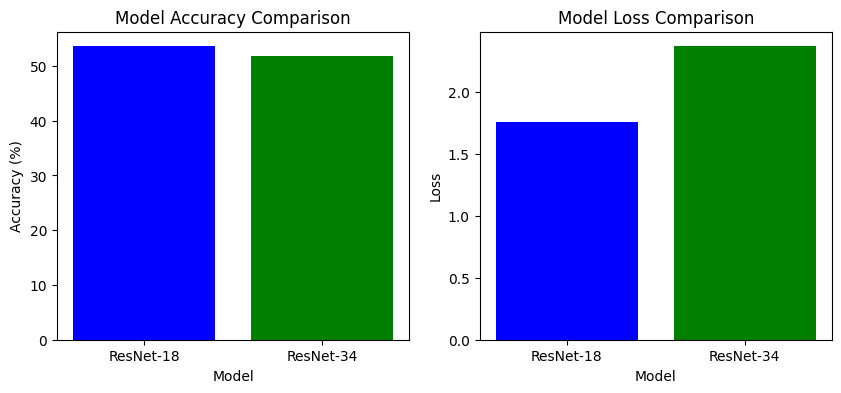

In [ ]:
import matplotlib.pyplot as plt

models = ["ResNet-18", "ResNet-34"]
accuracies = [acc18, acc34]
losses = [loss18, loss34]

plt.figure(figsize=(10, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")

# Loss plot
plt.subplot(1, 2, 2)
plt.bar(models, losses, color=['blue', 'green'])
plt.xlabel("Model")
plt.ylabel("Loss")
plt.title("Model Loss Comparison")

plt.show()

In [ ]:
!pip install torch torchvision numpy scipy

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split

# Define transformation for normalization (Min-Max Scaling)
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize((0.0,), (1.0,))  # Min-Max Scaling (0 to 1)
])

# Load MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

print(f"Train Dataset Size: {len(trainset)}")
print(f"Test Dataset Size: {len(testset)}")

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 490kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.87MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.81MB/s]

Train Dataset Size: 60000
Test Dataset Size: 10000


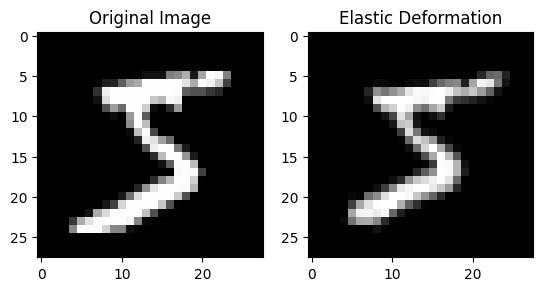

In [ ]:
import numpy as np
import scipy.ndimage

def elastic_transform(image, alpha, sigma):
    """Apply elastic transformation to a single image.

    Args:
    - image: (H, W) numpy array (grayscale image)
    - alpha: Scaling factor for distortion
    - sigma: Standard deviation for Gaussian filter

    Returns:
    - Transformed image as a tensor
    """
    random_state = np.random.RandomState(None)
    shape = image.shape

    # Generate random displacement fields
    dx = scipy.ndimage.gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
    dy = scipy.ndimage.gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha

    # Create meshgrid and apply distortions
    x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
    indices = np.reshape(y + dy, (-1, 1)), np.reshape(x + dx, (-1, 1))

    # Apply transformation
    distorted_image = scipy.ndimage.map_coordinates(image, indices, order=1, mode='reflect')
    return torch.tensor(distorted_image, dtype=torch.float32).unsqueeze(0)  # Convert to tensor

# Example of applying elastic transformation
import matplotlib.pyplot as plt

original_img = trainset[0][0].squeeze().numpy()  # Get a sample image
transformed_img = elastic_transform(original_img, alpha=36, sigma=5).squeeze().numpy()

# Plot original and transformed images
transformed_img = transformed_img.reshape(original_img.shape)  # Reshape to 2D

# Plot original and transformed images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(original_img, cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(transformed_img, cmap="gray")
ax[1].set_title("Elastic Deformation")

plt.show()